In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
data_nse = yf.download('^NSEI', start='2010-01-01', end='2023-05-01')
data_nasdaq = yf.download('^IXIC', start='2010-01-01', end='2023-05-01')

data_nse['Daily Returns'] = 100*(data_nse['Close'] - data_nse['Open'])/(data_nse['Open'])
data_nasdaq['Daily Returns'] = 100*(data_nasdaq['Close'] - data_nasdaq['Open'])/(data_nasdaq['Open'])

data_nasdaq = data_nasdaq.reset_index()
data_nse = data_nse.reset_index()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
data_nse

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns
0,2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0,0.601825
1,2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0,0.014212
2,2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0,0.069151
3,2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0,-0.354040
4,2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0,-0.370423
...,...,...,...,...,...,...,...,...
3263,2023-04-24,17707.550781,17754.500000,17612.500000,17743.400391,17743.400391,255700,0.202454
3264,2023-04-25,17761.550781,17807.449219,17716.849609,17769.250000,17769.250000,297400,0.043348
3265,2023-04-26,17767.300781,17827.750000,17711.199219,17813.599609,17813.599609,233000,0.260584
3266,2023-04-27,17813.099609,17931.599609,17797.900391,17915.050781,17915.050781,241400,0.572338


In [4]:
data_nasdaq

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns
0,2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000,0.610615
1,2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000,0.062409
2,2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000,-0.286859
3,2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000,0.085287
4,2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000,1.087579
...,...,...,...,...,...,...,...,...
3348,2023-04-24,12053.469727,12103.580078,11960.299805,12037.200195,12037.200195,4854050000,-0.134978
3349,2023-04-25,11968.809570,11990.459961,11798.769531,11799.160156,11799.160156,4806020000,-1.417429
3350,2023-04-26,11913.230469,11967.990234,11833.070312,11854.349609,11854.349609,5281970000,-0.494248
3351,2023-04-27,11972.150391,12154.009766,11950.919922,12142.240234,12142.240234,5253710000,1.420713


In [5]:
merged_data = pd.merge(data_nasdaq[['Date', 'Close']], data_nse[['Date', 'Close']], on='Date')
merged_data

,Date,Close_x,Close_y
0,2010-01-04,2308.419922,5232.200195
1,2010-01-05,2308.709961,5277.899902
2,2010-01-06,2301.090088,5281.799805
3,2010-01-07,2300.050049,5263.100098
4,2010-01-08,2317.169922,5244.750000
...,...,...,...
3177,2023-04-24,12037.200195,17743.400391
3178,2023-04-25,11799.160156,17769.250000
3179,2023-04-26,11854.349609,17813.599609
3180,2023-04-27,12142.240234,17915.050781


In [6]:
data_nse = data_nse[data_nse['Date'].isin(merged_data['Date'])]
data_nasdaq = data_nasdaq[data_nasdaq['Date'].isin(merged_data['Date'])]

data_nasdaq = data_nasdaq.reset_index().drop('index', axis=1)
data_nse = data_nse.reset_index().drop('index', axis=1)

In [7]:
data_nse

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns
0,2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0,0.601825
1,2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0,0.014212
2,2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0,0.069151
3,2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0,-0.354040
4,2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0,-0.370423
...,...,...,...,...,...,...,...,...
3177,2023-04-24,17707.550781,17754.500000,17612.500000,17743.400391,17743.400391,255700,0.202454
3178,2023-04-25,17761.550781,17807.449219,17716.849609,17769.250000,17769.250000,297400,0.043348
3179,2023-04-26,17767.300781,17827.750000,17711.199219,17813.599609,17813.599609,233000,0.260584
3180,2023-04-27,17813.099609,17931.599609,17797.900391,17915.050781,17915.050781,241400,0.572338


In [8]:
data_nasdaq

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns
0,2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000,0.610615
1,2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000,0.062409
2,2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000,-0.286859
3,2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000,0.085287
4,2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000,1.087579
...,...,...,...,...,...,...,...,...
3177,2023-04-24,12053.469727,12103.580078,11960.299805,12037.200195,12037.200195,4854050000,-0.134978
3178,2023-04-25,11968.809570,11990.459961,11798.769531,11799.160156,11799.160156,4806020000,-1.417429
3179,2023-04-26,11913.230469,11967.990234,11833.070312,11854.349609,11854.349609,5281970000,-0.494248
3180,2023-04-27,11972.150391,12154.009766,11950.919922,12142.240234,12142.240234,5253710000,1.420713


In [9]:
correlation_coefficient = np.corrcoef(merged_data['Close_x'], merged_data['Close_y'])[0, 1]
correlation_coefficient

0.9513138758576785

[0.9434675919053851, 0.9439585841757137, 0.9444449257356795, 0.9449920822098854, 0.9455306106805283, 0.9460633295628978, 0.9466095202451899, 0.9471446302076989, 0.9477096919386554, 0.9482362261854126, 0.9487513102148093, 0.9492839758160373, 0.9497767429972324, 0.9502862801160048, 0.9507737700328759, 0.9513138758576785, 0.9516503507715617, 0.9517639726726104, 0.9518652512683696, 0.9519697336679616, 0.9520755817110503, 0.9521699858696246, 0.9522823272755723, 0.9523740066690728, 0.952429321667095, 0.9524489370596473, 0.9524735208555903, 0.9525046891612214, 0.9525043391188187, 0.9524763924945747, 0.9524737996586069]


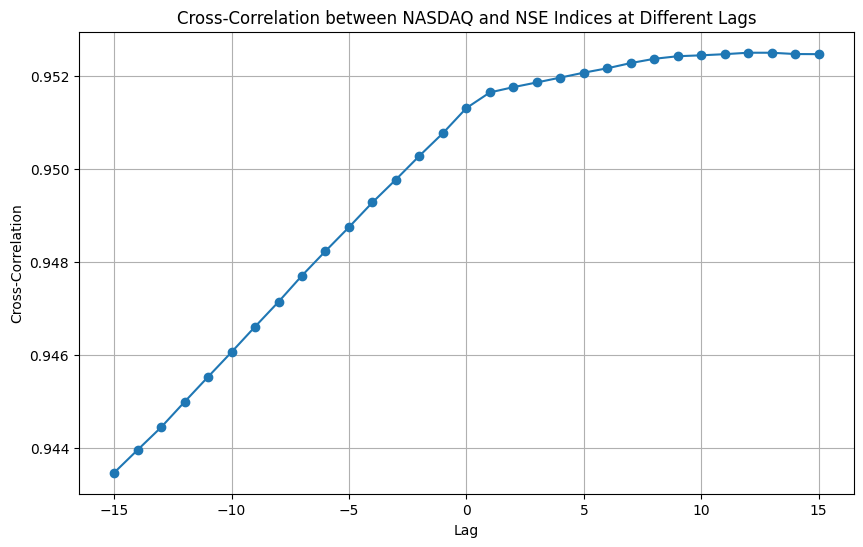

Best Lag: 12
NASDAQ leads NSE by 12 days.


In [10]:
lags = range(-15, 16)  # Set the range of lags to consider
# cross_corr_values = [np.corrcoef(merged_data['Close_x'].shift(lag)[lag:], merged_data['Close_y'][lag:])[0,1] for lag in lags]
cross_corr_values = []
for lag in lags:
    if lag >= 0:
        cross_corr_values.append(np.corrcoef(merged_data['Close_x'].shift(lag)[lag:], merged_data['Close_y'][lag:])[0,1])
    else:
        cross_corr_values.append(np.corrcoef(merged_data['Close_x'].shift(lag)[:lag], merged_data['Close_y'][:lag])[0,1])

print(cross_corr_values)
# Plot the cross-correlation values against the lag periods
plt.figure(figsize=(10, 6))
plt.plot(lags, cross_corr_values, marker='o', linestyle='-')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation between NASDAQ and NSE Indices at Different Lags')
plt.grid(True)
plt.show()

# Find the lag with the highest cross-correlation value
best_lag = lags[np.argmax(cross_corr_values)]
print("Best Lag:", best_lag)

# Determine if NASDAQ leads or lags NSE based on the lag with the highest correlation
if best_lag > 0:
    print("NASDAQ leads NSE by", best_lag, "days.")
elif best_lag < 0:
    print("NSE leads NASDAQ by", abs(best_lag), "days.")
else:
    print("No consistent lead-lag relationship found.")

In [11]:
# MACD = 12day EMA - 26day EMA
# data_nasdaq['macd'] = data_nasdaq['Close'].rolling(window=12).mean() - data_nasdaq['Close'].rolling(window=26).mean()
data_nasdaq['macd'] = data_nasdaq['Close'].ewm(span=12, adjust=False).mean() - data_nasdaq['Close'].ewm(span=26, adjust=False).mean()


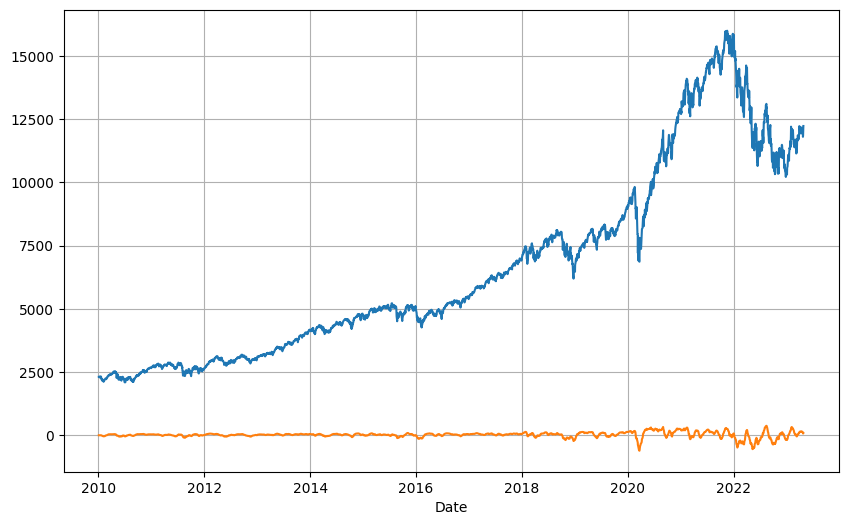

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(data_nasdaq['Date'], data_nasdaq['Close'], label='Close')
plt.plot(data_nasdaq['Date'], data_nasdaq['macd'], label='MACD')
plt.xlabel('Date')
# plt.title('Cross-Correlation between NASDAQ and NSE Indices at Different Lags')
plt.grid(True)
plt.show()

In [13]:
# Keltner Channel
data_nasdaq['ema20'] = data_nasdaq['Close'].ewm(span=12, adjust=False).mean()
data_nasdaq['atr'] = 0
for i in range(1, data_nasdaq.shape[0]):
    tr = max(
        abs(data_nasdaq.loc[i, 'High'] - data_nasdaq.loc[i, 'Low']),
        abs(data_nasdaq.loc[i, 'High'] - data_nasdaq.loc[i-1, 'Close']),
        abs(data_nasdaq.loc[i, 'Low'] - data_nasdaq.loc[i-1, 'Close']),
        )

    data_nasdaq.loc[i, 'atr'] = (data_nasdaq.loc[i-1, 'atr']*(i-1) + tr)/i

data_nasdaq

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns,macd,ema20,atr
0,2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000,0.610615,0.000000,2308.419922,0.000000
1,2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000,0.062409,0.023137,2308.464543,18.109863
2,2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000,-0.286859,-0.566852,2307.330012,18.250000
3,2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000,0.085287,-1.105601,2306.210017,17.526693
4,2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000,1.087579,-0.149410,2307.896157,19.892517
...,...,...,...,...,...,...,...,...,...,...,...
3177,2023-04-24,12053.469727,12103.580078,11960.299805,12037.200195,12037.200195,4854050000,-0.134978,115.863822,12052.200614,107.028690
3178,2023-04-25,11968.809570,11990.459961,11798.769531,11799.160156,11799.160156,4806020000,-1.417429,87.095753,12013.271313,107.070037
3179,2023-04-26,11913.230469,11967.990234,11833.070312,11854.349609,11854.349609,5281970000,-0.494248,67.966701,11988.821820,107.089465
3180,2023-04-27,11972.150391,12154.009766,11950.919922,12142.240234,12142.240234,5253710000,1.420713,75.170637,12012.424653,107.150021


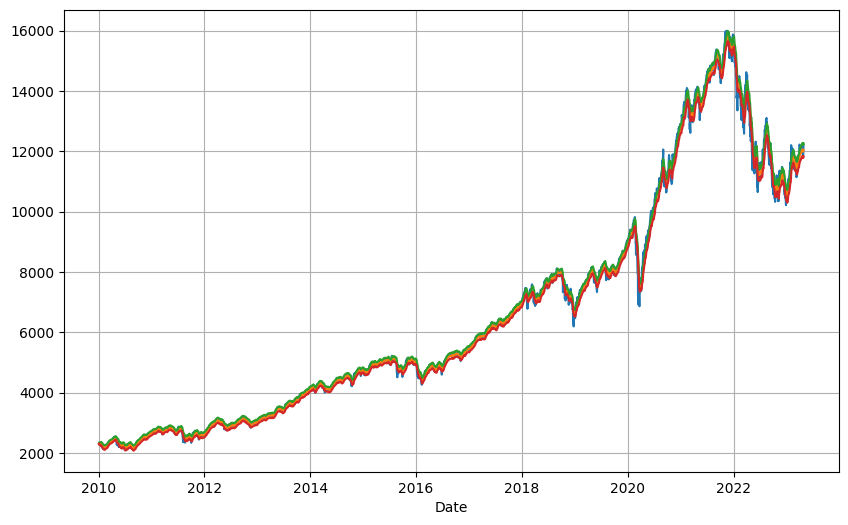

In [43]:
plt.figure(figsize=(10, 6))
# plt.plot(data_nasdaq['Date'], [data_nasdaq['Close'], data_nasdaq['ema20']])#, marker='o', linestyle='-')
plt.plot(data_nasdaq['Date'], data_nasdaq['Close'], label='Close')
plt.plot(data_nasdaq['Date'], data_nasdaq['ema20'], label='Mid')
plt.plot(data_nasdaq['Date'], data_nasdaq['ema20'] + 2*data_nasdaq['atr'], label='Upper')
plt.plot(data_nasdaq['Date'], data_nasdaq['ema20'] - 2*data_nasdaq['atr'], label='Lower')

plt.xlabel('Date')
# plt.title('Cross-Correlation between NASDAQ and NSE Indices at Different Lags')
plt.grid(True)
plt.show()

In [42]:
# Bollinger Bands
# 20 Day SMA
# print(sum(data_nasdaq['Close'][max(0,500-20): 500])/20)
data_nasdaq['sma20'] = 0
for i in range(20, data_nasdaq.shape[0]):
    data_nasdaq['sma20'][i] = sum(data_nasdaq['Close'][i-20: i])/20

data_nasdaq['typical_price'] = data_nasdaq['High'] + data_nasdaq['Low'] + data_nasdaq['Close']

data_nasdaq['tp_std'] = 0
for i in range(20, data_nasdaq.shape[0]):
    data_nasdaq['tp_std'][i] = np.std(np.array(data_nasdaq['typical_price'][i-20:i]))


<ipython-input-42-956478d9875d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nasdaq['sma20'][i] = sum(data_nasdaq['Close'][i-20: i])/20
<ipython-input-42-956478d9875d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nasdaq['tp_std'][i] = np.std(np.array(data_nasdaq['typical_price'][i-20:i]))


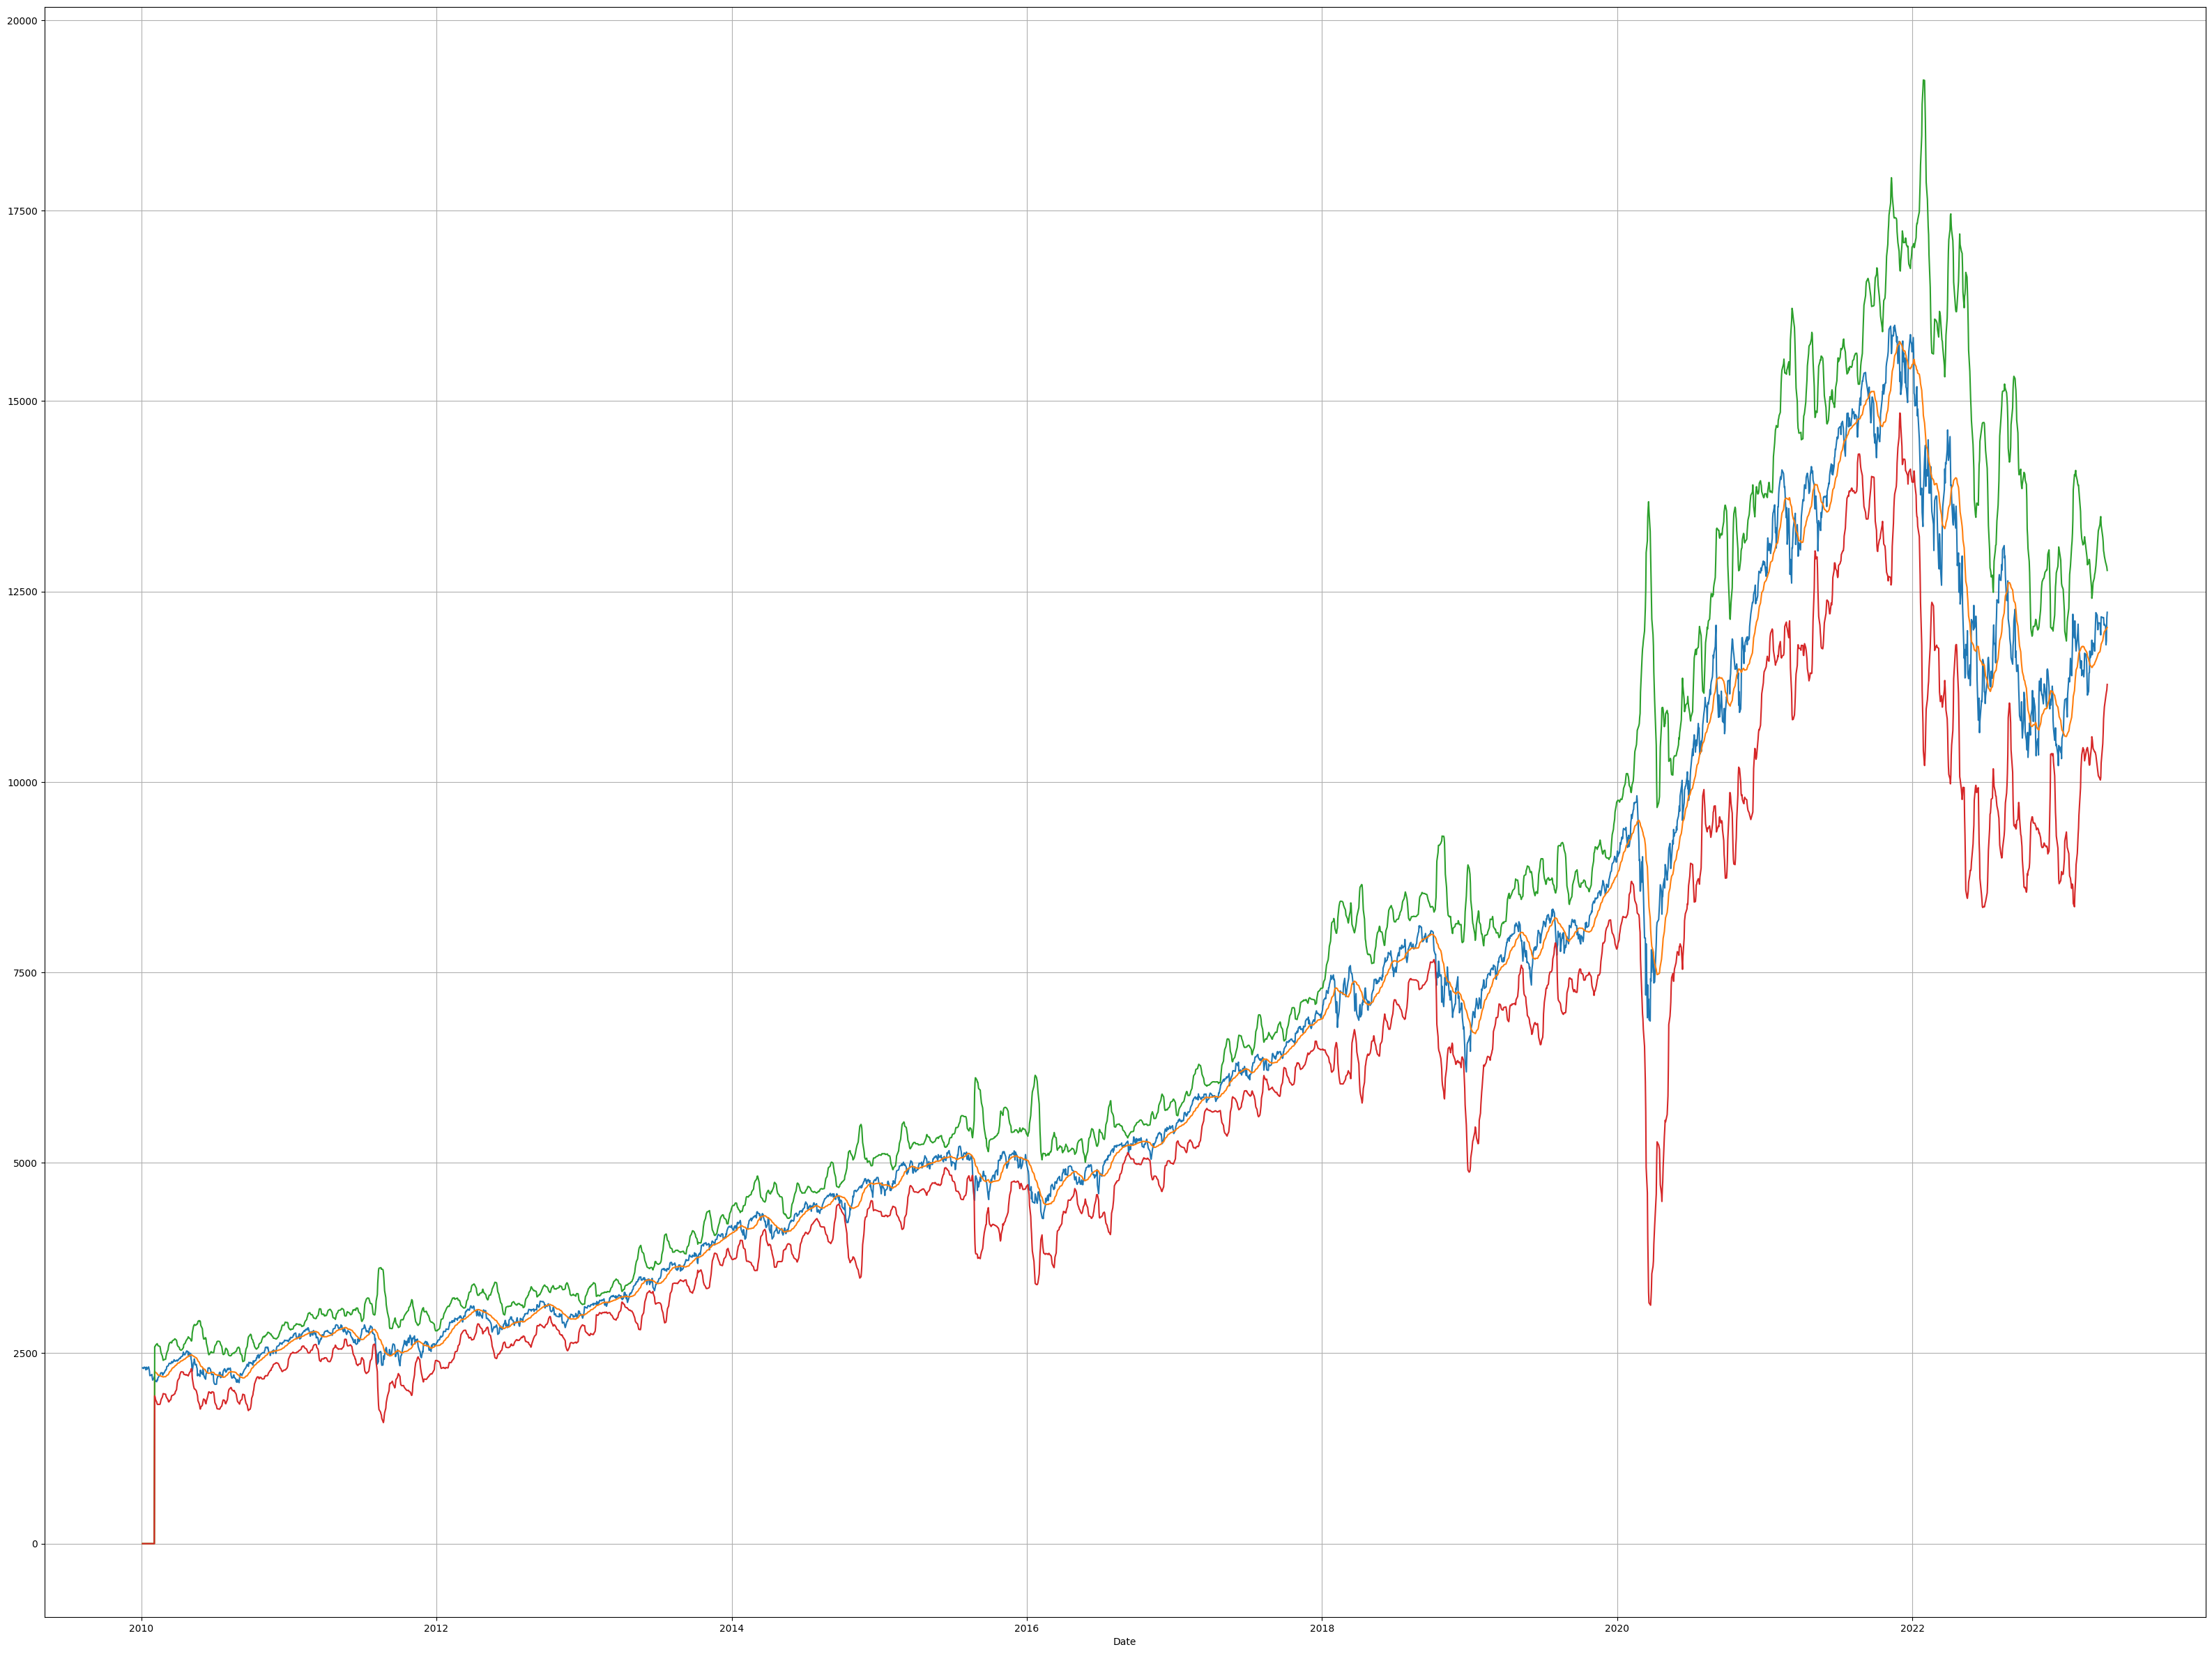

In [16]:
plt.figure(figsize=(40, 30))
plt.plot(data_nasdaq['Date'], data_nasdaq['Close'], label='Close')
plt.plot(data_nasdaq['Date'], data_nasdaq['sma20'], label='Mid')
plt.plot(data_nasdaq['Date'], data_nasdaq['sma20'] + 2*data_nasdaq['tp_std'], label='Upper')
plt.plot(data_nasdaq['Date'], data_nasdaq['sma20'] - 2*data_nasdaq['tp_std'], label='Lower')

plt.xlabel('Date')
# plt.title('Cross-Correlation between NASDAQ and NSE Indices at Different Lags')
plt.grid(True)
plt.show()

Creating Buy/Sell Signals

In [41]:
# MACD Signal
data_nse['macd_signal'] = 0
for i in range(1, data_nasdaq.shape[0]):
    if data_nasdaq.loc[i-1, 'macd'] > 0 and data_nasdaq.loc[i, 'macd'] < 0:
        data_nse.loc[i, 'macd_signal'] = -1
    elif data_nasdaq.loc[i-1, 'macd'] < 0 and data_nasdaq.loc[i, 'macd'] > 0:
        data_nse.loc[i, 'macd_signal'] = +1

In [63]:
# Bollinger Band Signal
data_nse['bollinger_signal'] = 0
for i in range(20, data_nasdaq.shape[0]):
    lower_bb = data_nasdaq.loc[i, 'sma20'] - 2*data_nasdaq.loc[i, 'tp_std']
    upper_bb = data_nasdaq.loc[i, 'sma20'] + 2*data_nasdaq.loc[i, 'tp_std']
    close = data_nasdaq.loc[i, 'sma20']
    if abs(close-upper_bb)/upper_bb < 0.05:
        data_nse.loc[i, 'bollinger_signal'] = +1
    elif abs(close-lower_bb)/lower_bb < 0.06:
        data_nse.loc[i, 'bollinger_signal'] = -1

In [64]:
# Keltner Channel Signal
data_nse['keltner_signal'] = 0
for i in range(20, data_nasdaq.shape[0]):
    if data_nasdaq.loc[i, 'Close'] < data_nasdaq.loc[i, 'ema20'] - 2*data_nasdaq.loc[i, 'atr']:
        data_nse.loc[i, 'keltner_signal'] = -1
    elif data_nasdaq.loc[i, 'Close'] > data_nasdaq.loc[i, 'ema20'] + 2*data_nasdaq.loc[i, 'atr']:
        data_nse.loc[i, 'keltner_signal'] = +1

Actual trading

In [65]:
balance = initial = 1000000
shares = 0
trnx1 = pd.DataFrame(columns=['Date', 'BuySell', 'Amount', 'Balance', ])
trnx1.loc[0, :] = [data_nse.loc[0,'Date'], 0, shares, balance]
print(trnx1)
for i in range(data_nse.shape[0]):
    if data_nse.loc[i, 'macd_signal'] == 1:
        trnx1.loc[i, 'Date'] = data_nse.loc[i, 'Date']
        trnx1.loc[i, 'BuySell'] = int(max(0, balance)*0.6/data_nse.loc[i, 'Open'])
        trnx1.loc[i, 'Amount'] = (-1) * trnx1.loc[i, 'BuySell'] * data_nse.loc[i, 'Open']
        trnx1.loc[i, 'Balance'] = balance + trnx1.loc[i, 'Amount']

        balance = trnx1.loc[i, 'Balance']
        shares += trnx1.loc[i, 'BuySell']

    elif data_nse.loc[i, 'macd_signal'] == -1:
        trnx1.loc[i, 'Date'] = data_nse.loc[i, 'Date']
        trnx1.loc[i, 'BuySell'] = (-1) * int(shares * 0.7)
        trnx1.loc[i, 'Amount'] = (-1) * trnx1.loc[i, 'BuySell'] * data_nse.loc[i, 'Close']
        trnx1.loc[i, 'Balance'] = balance + trnx1.loc[i, 'Amount']

        balance = trnx1.loc[i, 'Balance']
        shares += trnx1.loc[i, 'BuySell']

    else:
        trnx1.loc[i, 'Date'] = data_nse.loc[i, 'Date']
        trnx1.loc[i, 'BuySell'] = 0
        trnx1.loc[i, 'Amount'] = 0
        trnx1.loc[i, 'Balance'] = balance
    
    if i == data_nse.shape[0] - 1:
        trnx1.loc[i, 'Date'] = data_nse.loc[i, 'Date']
        trnx1.loc[i, 'BuySell'] = (-1) * int(shares)
        trnx1.loc[i, 'Amount'] = (-1) * trnx1.loc[i, 'BuySell'] * data_nse.loc[i, 'Close']
        trnx1.loc[i, 'Balance'] = balance + trnx1.loc[i, 'Amount']

        balance = trnx1.loc[i, 'Balance']
        shares += trnx1.loc[i, 'BuySell']
    trnx1.loc[i, 'Value'] = trnx1.loc[i, 'Balance'] + data_nse.loc[i, 'Close']*shares

                  Date BuySell Amount  Balance
0  2010-01-04 00:00:00       0      0  1000000


In [66]:
balance = initial = 1000000
shares = 0
trnx2 = pd.DataFrame(columns=['Date', 'BuySell', 'Amount', 'Balance', ])
trnx2.loc[0, :] = [data_nse.loc[0,'Date'], 0, shares, balance]
print(trnx2)
for i in range(data_nse.shape[0]):
    if data_nse.loc[i, 'bollinger_signal'] == 1:
        trnx2.loc[i, 'Date'] = data_nse.loc[i, 'Date']
        trnx2.loc[i, 'BuySell'] = int(max(0, balance)*0.7/data_nse.loc[i, 'Open'])
        trnx2.loc[i, 'Amount'] = (-1) * trnx2.loc[i, 'BuySell'] * data_nse.loc[i, 'Open']
        trnx2.loc[i, 'Balance'] = balance + trnx2.loc[i, 'Amount']

        balance = trnx2.loc[i, 'Balance']
        shares += trnx2.loc[i, 'BuySell']

    elif data_nse.loc[i, 'bollinger_signal'] == -1:
        trnx2.loc[i, 'Date'] = data_nse.loc[i, 'Date']
        trnx2.loc[i, 'BuySell'] = (-1) * int(shares * 0.4)
        trnx2.loc[i, 'Amount'] = (-1) * trnx2.loc[i, 'BuySell'] * data_nse.loc[i, 'Close']
        trnx2.loc[i, 'Balance'] = balance + trnx2.loc[i, 'Amount']

        balance = trnx2.loc[i, 'Balance']
        shares += trnx2.loc[i, 'BuySell']

    else:
        trnx2.loc[i, 'Date'] = data_nse.loc[i, 'Date']
        trnx2.loc[i, 'BuySell'] = 0
        trnx2.loc[i, 'Amount'] = 0
        trnx2.loc[i, 'Balance'] = balance
    
    if i == data_nse.shape[0] - 1:
        trnx2.loc[i, 'Date'] = data_nse.loc[i, 'Date']
        trnx2.loc[i, 'BuySell'] = (-1) * int(shares)
        trnx2.loc[i, 'Amount'] = (-1) * trnx2.loc[i, 'BuySell'] * data_nse.loc[i, 'Close']
        trnx2.loc[i, 'Balance'] = balance + trnx2.loc[i, 'Amount']

        balance = trnx2.loc[i, 'Balance']
        shares += trnx2.loc[i, 'BuySell']
    trnx2.loc[i, 'Value'] = trnx2.loc[i, 'Balance'] + data_nse.loc[i, 'Close']*shares

                  Date BuySell Amount  Balance
0  2010-01-04 00:00:00       0      0  1000000


In [67]:
balance = initial = 1000000
shares = 0
trnx3 = pd.DataFrame(columns=['Date', 'BuySell', 'Amount', 'Balance', ])
trnx3.loc[0, :] = [data_nse.loc[0,'Date'], 0, shares, balance]
print(trnx3)
for i in range(data_nse.shape[0]):
    if data_nse.loc[i, 'keltner_signal'] == 1:
        trnx3.loc[i, 'Date'] = data_nse.loc[i, 'Date']
        trnx3.loc[i, 'BuySell'] = int(max(0, balance)*0.8/data_nse.loc[i, 'Open'])
        trnx3.loc[i, 'Amount'] = (-1) * trnx3.loc[i, 'BuySell'] * data_nse.loc[i, 'Open']
        trnx3.loc[i, 'Balance'] = balance + trnx3.loc[i, 'Amount']

        balance = trnx3.loc[i, 'Balance']
        shares += trnx3.loc[i, 'BuySell']

    elif data_nse.loc[i, 'keltner_signal'] == -1:
        trnx3.loc[i, 'Date'] = data_nse.loc[i, 'Date']
        trnx3.loc[i, 'BuySell'] = (-1) * int(shares * 0.4)
        trnx3.loc[i, 'Amount'] = (-1) * trnx3.loc[i, 'BuySell'] * data_nse.loc[i, 'Close']
        trnx3.loc[i, 'Balance'] = balance + trnx3.loc[i, 'Amount']

        balance = trnx3.loc[i, 'Balance']
        shares += trnx3.loc[i, 'BuySell']

    else:
        trnx3.loc[i, 'Date'] = data_nse.loc[i, 'Date']
        trnx3.loc[i, 'BuySell'] = 0
        trnx3.loc[i, 'Amount'] = 0
        trnx3.loc[i, 'Balance'] = balance
    
    if i == data_nse.shape[0] - 1:
        trnx3.loc[i, 'Date'] = data_nse.loc[i, 'Date']
        trnx3.loc[i, 'BuySell'] = (-1) * int(shares)
        trnx3.loc[i, 'Amount'] = (-1) * trnx3.loc[i, 'BuySell'] * data_nse.loc[i, 'Close']
        trnx3.loc[i, 'Balance'] = balance + trnx3.loc[i, 'Amount']

        balance = trnx3.loc[i, 'Balance']
        shares += trnx3.loc[i, 'BuySell']
    trnx3.loc[i, 'Value'] = trnx3.loc[i, 'Balance'] + data_nse.loc[i, 'Close']*shares


                  Date BuySell Amount  Balance
0  2010-01-04 00:00:00       0      0  1000000


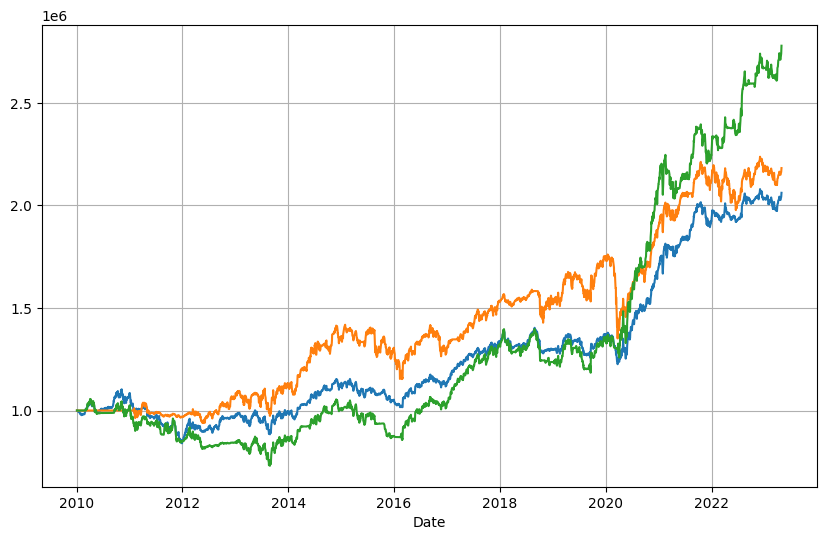

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(trnx1['Date'], trnx1['Value'], label='Value')
plt.plot(trnx2['Date'], trnx2['Value'], label='Value')
plt.plot(trnx3['Date'], trnx3['Value'], label='Value')

plt.xlabel('Date')
plt.grid(True)
plt.show()

In [69]:
df = [trnx1, trnx2, trnx3]
print("Strategies: ['MACD', 'Bollinger Bands', 'Keltner Channel']")


################## CUMMULATIVE RETURNS #################
df_cr = []
for i in range(3):
    df_cr.append(100*(list(df[i]['Value'])[-1] - df[i]['Value'][0])/df[i]['Value'][0])
print('Cummulative Returns: ', df_cr)


################## SHARPE RATIO #################
df_volatility = []
for i in range(3):
    days = df[i].shape[0]
    vol = []
    for j in range(1, days):
        vol.append(100*np.log(df[i]['Value'][j] / df[i]['Value'][j-1]))
    df_volatility.append(np.std(vol))
df_annvol = [math.sqrt(252)*i for i in df_volatility]

df_sr = []
for i in range(3):
    ret = (1+(df_cr[i]/100)**(365/4898)-1)*100
    df_sr.append((ret-5.52)/df_annvol[i])
print('Sharpe Ratio: ', df_sr)

############### MAXIMUM DRAWDOWN #################
df_mdd = []
for i in range(3):
    data = list(df[i]['Value'])
    days = len(data)
    peak = data[0]
    mdd = []
    prices_between = []
    for i in range(1, days):
        if data[i] >= peak:
            if prices_between:
                mdd.append(100*(peak - min(prices_between))/peak)
            peak = data[i]
            prices_between = []
        else:
            prices_between.append(data[i])
    df_mdd.append(-1*max(mdd))
print('Maximum Drawdown: ', df_mdd)


Strategies: ['MACD', 'Bollinger Bands', 'Keltner Channel']
Cummulative Returns:  [106.1867734375, 118.2515291015625, 177.92842143554688]
Sharpe Ratio:  [10.520068640118438, 8.561388353630594, 8.159409430622794]
Maximum Drawdown:  [-23.86169763334174, -23.216786339704054, -30.818688409003098]
